# Scikit-Learn 소개

## Scikit-Learn에서의 데이터 표현 방식

### 테이블로서의 데이터

In [1]:
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings(action='ignore') 

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


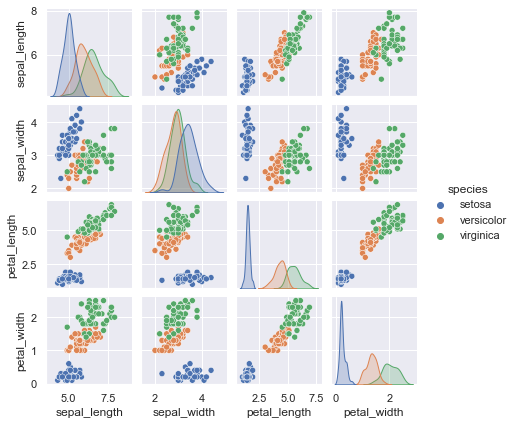

In [3]:
sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5)

In [4]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

### 지도 학습 예제 : 간단한 선형 회귀

In [6]:
import matplotlib.pyplot as plt
import numpy as np

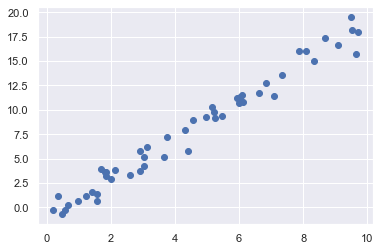

In [7]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [8]:
# 1. 모델 클래스 선택
from sklearn.linear_model import LinearRegression

In [9]:
# 2. 모델 초모수 선택
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
# 3. 데이터를 특징 행렬과 대상 벡터로 배치
X = x[:, np.newaxis]
X.shape

(50, 1)

In [11]:
# 4. 모델을 데이터에 적합
model.fit(X, y)

LinearRegression()

In [12]:
model.coef_

array([1.9776566])

In [13]:
model.intercept_

-0.903310725531111

In [14]:
# 5. 테스트 데이터에 대한 레이블 예측
xfit = np.linspace(-1, 11)

In [15]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

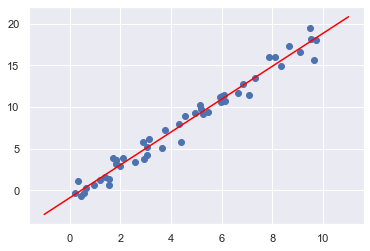

In [16]:
plt.scatter(X,y)
plt.plot(xfit, yfit, color = "red")

### 지도 학습 예제 : 붓꽃 분류

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [18]:
from sklearn.naive_bayes import GaussianNB # 1. 모델 클래스 선택
model = GaussianNB()                                            # 2. 모델 인스턴스화
model.fit(Xtrain, ytrain)                                          # 3. 모델을 데이터에 적합
y_model = model.predict(Xtest)                           # 4. 새 데이터에  대해 예측

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### 비지도 학습 예제 : 붓꽃 차원

In [20]:
from sklearn.decomposition import PCA # 1. 모델 클래스 선택
model = PCA(n_components = 2)               # 2. 초모수로 모델 인스턴스화
model.fit(X_iris)                                              # 3. 데이터에 적합. y는 지정하지 않음
X_2D = model.transform(X_iris)                 # 4. 데이터를 2차원으로 변환

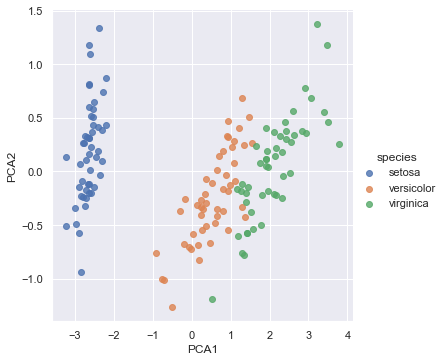

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data = iris, fit_reg = False)

### 비지도 학습 : 붓꽃 군집화

In [22]:
from sklearn.mixture import GaussianMixture            # 1. 모델 클래스 선택
model = GaussianMixture(n_components = 3,
                          covariance_type = 'full')                          # 2. 초모수로 모델 인스턴스화
model.fit(X_iris)                                                                  # 3. 데이터에 적합. y는 지정하지 않음
y_gmm = model.predict(X_iris)                                       # 4. 군집 레이블 결정

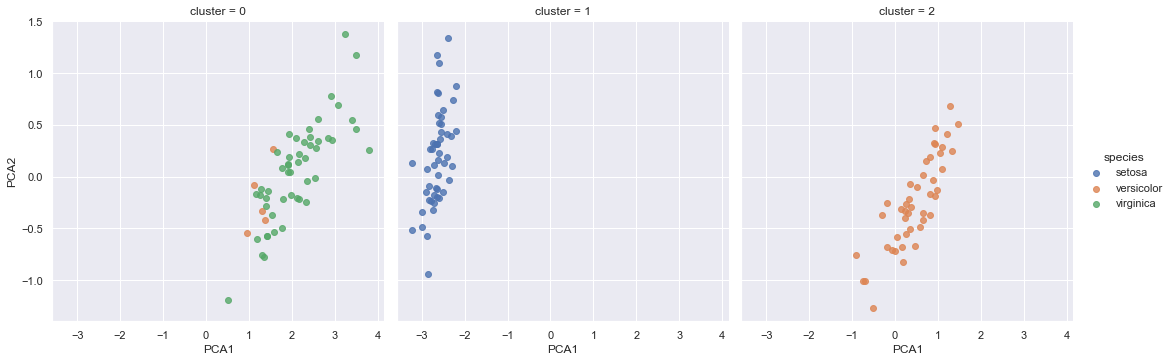

In [23]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

## 응용 : 손으로 쓴 숫자 탐색

### 숫자 데이터 적재 및 시각화

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

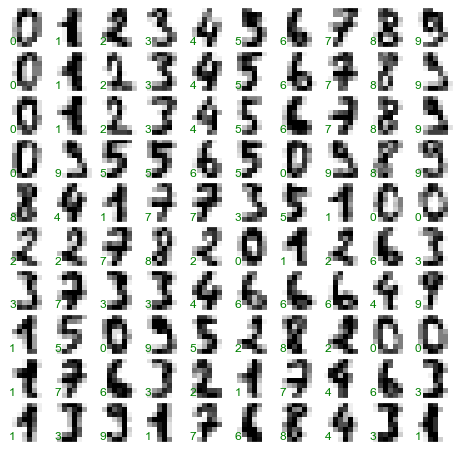

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize = (8,8), subplot_kw = {'xticks':[], 'yticks' : []},
                                          gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
                  transform=ax.transAxes, color='green')

In [26]:
X = digits.data
X.shape

(1797, 64)

In [27]:
y = digits.target
y.shape

(1797,)

### 비지도 학습 : 차원 축소

In [28]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

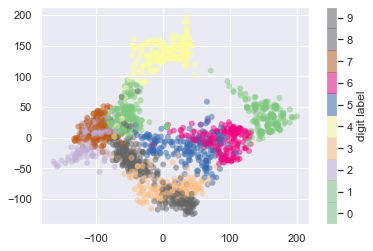

In [29]:
plt.scatter(data_projected[:,0], data_projected[:, 1], c = digits.target, edgecolor='none', alpha = 0.5, cmap = plt.cm.get_cmap('Accent', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

### 숫자 분류

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(80.90000000000006, 0.5, 'true value')

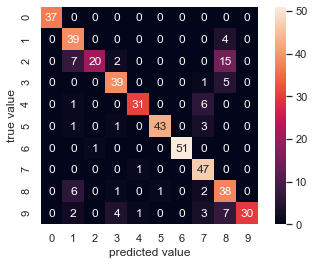

In [32]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square = True, annot = True, cbar = True)
plt.xlabel('predicted value')
plt.ylabel('true value')

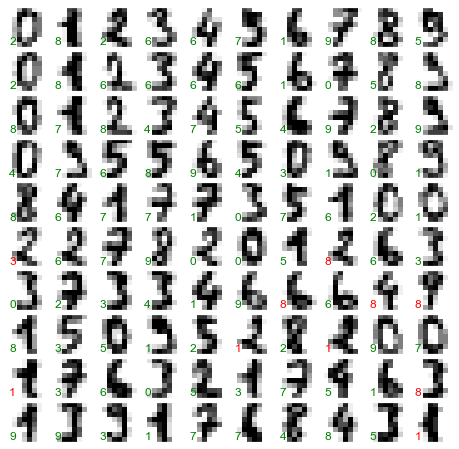

In [33]:
fig, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = {'xticks': [], 'yticks':[]}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform = ax.transAxes, color = 'green' if (ytest[i] ==y_model[i]) else 'red')